In [78]:
import pandas as pd
import seaborn as sns
import numpy as np

from pathlib import Path

In [64]:
# sns settings
sns.set_palette("Set2")
sns.set_style("whitegrid")


In [43]:
loss_files_folder = Path("./loss_logs")

In [44]:
loss_small = pd.read_csv((loss_files_folder / "ganblr_0_10.csv"), header=None)

In [45]:
COLUMN_NAMES = ["K", "EPOCH", "GENERATOR LOSS", "GENERATOR ACCURACY", "DISCRIMINATOR LOSS", "DISCRIMINATOR ACCURACY", "SHAPE"]
COLUMN_NAMES = ["K", "GENERATOR LOSS", "GENERATOR ACCURACY", "DISCRIMINATOR LOSS", "DISCRIMINATOR ACCURACY", "SHAPE"]

In [109]:
def create_graph_from_csv(file_path, to_plot = "LOSS", from_compontent = "GENERATOR"):
    frame = pd.read_csv(file_path, header=None)
    
    frame.drop(frame.columns[0], axis=1, inplace=True)
    
    new_frame = pd.DataFrame(columns=COLUMN_NAMES)
    
    for col_old, col_new in zip(frame.columns, COLUMN_NAMES):
        new_frame[col_new] = frame[col_old].str.split(":").str[1]
    
    
    new_frame["GENERATOR LOSS"] = new_frame["GENERATOR LOSS"].astype(float)
    new_frame["DISCRIMINATOR LOSS"] = new_frame["DISCRIMINATOR LOSS"].astype(float)
    
    EPOCHS = list(range(0, len(frame) // 3)) * 3
    
    new_frame["EPOCHS"] = EPOCHS
    
    
    sns.lineplot(x="EPOCHS", y=f"{from_compontent} {to_plot}", hue="SHAPE", data=new_frame)
    

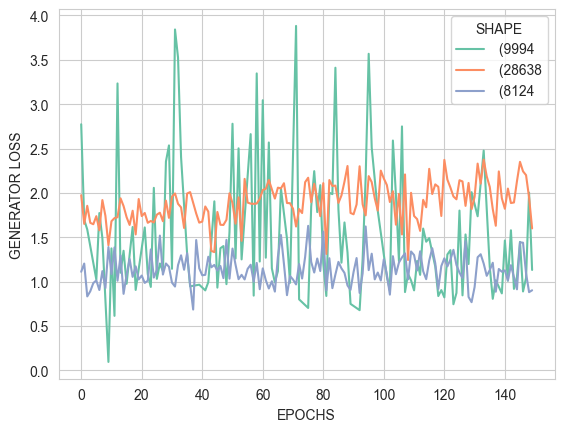

In [110]:
create_graph_from_csv(loss_files_folder / "ganblr_1_150.csv")

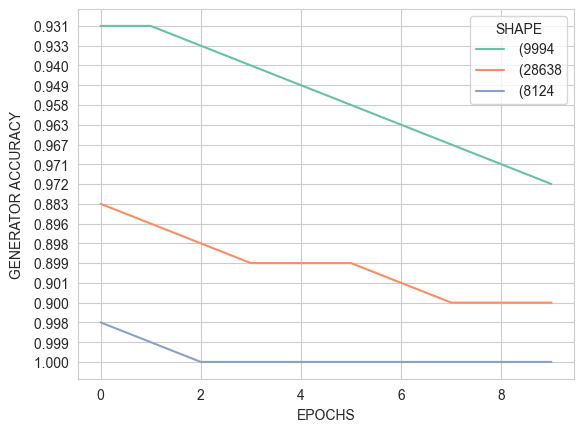

In [112]:
create_graph_from_csv(loss_files_folder / "ganblr_1_10.csv", to_plot="ACCURACY")

In [48]:
def read_in_and_transpose_by_column(frame: pd.DataFrame):
    
    #drop first column, only timestamp
    frame = frame.drop(0, axis=1)
    
    # lambda for each column
    print(frame.apply(lambda x: x.str.split(":")))
    
        
    return frame

In [49]:
loss_small = create_table_from_csv(loss_files_folder / "ganblr_0_10.csv")

In [60]:
# cast generator loss to float
loss_small["GENERATOR LOSS"] = loss_small["GENERATOR LOSS"].astype(float)

In [57]:
ids = list(range(0, 10)) * 3

In [62]:
# append ids as new column until lenght of frame
loss_small["EPOCH"] = ids

<Axes: xlabel='EPOCH', ylabel='GENERATOR LOSS'>

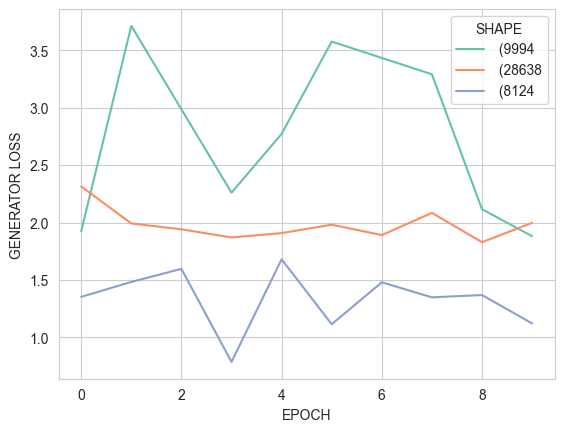

In [65]:
# group by shape then plot id to loss
sns.lineplot(x="EPOCH", y="GENERATOR LOSS", hue="SHAPE", data=loss_small)